Сырчин Владислав,
1 лаб. раб.,
Вариант 5.

In [16]:
import pandas as pd
import re
table = pd.read_csv(r'C:\cneos_fireball_data.csv')
table.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


Метеоритная защита земли
1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
2. Определите метеорит с максимальной и минимальной скоростью.
3. Определите место максимальной концентрации метеоритов.
4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
5. Удалить строки данных, в которых для метеоритов не указана скорость.
6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.
7. Заполните строки в которых для метеоритов не указана скорость.
8. Определить месяц года, для которого появление метеоритов наиболее вероятно (построить необходимые графики).

In [39]:
#1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
place = table[table['Total Radiated Energy (J)'] == table['Total Radiated Energy (J)'].max()]
place[['Latitude (deg.)', 'Longitude (deg.)']]

,Latitude (deg.),Longitude (deg.)
146,54.8N,61.1E


In [40]:
#2. Определите метеорит с максимальной и минимальной скоростью.
table[table['Velocity (km/s)'] == table['Velocity (km/s)'].max()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),month,time,hour,hemisphere
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18,07,01:40:11,01,NE


In [41]:
#2. Определите метеорит с максимальной и минимальной скоростью.
table[table['Velocity (km/s)'] == table['Velocity (km/s)'].min()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),month,time,hour,hemisphere
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12,07,17:40:19,17,NW


In [42]:
table['month'] = table['Peak Brightness Date/Time (UT)'].str.split('-').str.get(1)
table['time'] = table['Peak Brightness Date/Time (UT)'].str.split(chr(32)).str.get(1)
table['hour'] = table['time'].str.split(':').str.get(0)
table['hemisphere'] = table['Latitude (deg.)'].str.split('\d+.\d').str.get(1) + table['Longitude (deg.)'].str.split('\d+.\d').str.get(1)
table.head(8)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),month,time,hour,hemisphere
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,16.9,NaN,NaN,NaN,5.800000e+10,0.19,07,22:01:35,22,NW
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,07,06:12:38,06,SW
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,07,09:30:36,09,NE
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,06,14:26:45,14,SE
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,06,20:21:55,20,NE
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60,06,13:41:32,13,SE
6,2017-05-24 07:03:03,9.1S,101.8E,46.0,18.4,-6.5,-16.5,-5.0,9.000000e+10,0.28,05,07:03:03,07,SE
7,2017-05-22 17:44:39,49.6S,157.6W,33.0,16.9,NaN,NaN,NaN,3.500000e+10,0.12,05,17:44:39,17,SW


In [43]:
#3. Определите место максимальной концентрации метеоритов.
table['hemisphere'].value_counts()

SE    149
NE    138
NW    126
SW    126
Name: hemisphere, dtype: int64

In [44]:
#4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
month = table['month'].value_counts()
dicT = ({'01': 'Зима', '02': 'Зима', '03': 'Весна', '04': 'Весна', '05': 'Весна', '06': 'Лето', '07': 'Лето', '08': 'Лето', '09': 'Осень', '10': 'Осень', '11': 'Осень', '12': 'Зима'})
dicT.get(list(month.items())[list(month).index(month.max())][0])

'Осень'

In [45]:
#5. Удалить строки данных, в которых для метеоритов не указана скорость.
velocity = table.dropna(subset=['Velocity (km/s)']) 
velocity.head(8)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),month,time,hour,hemisphere
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,16.9,NaN,NaN,NaN,5.800000e+10,0.19,07,22:01:35,22,NW
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,07,06:12:38,06,SW
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,07,09:30:36,09,NE
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,06,14:26:45,14,SE
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,06,20:21:55,20,NE
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60,06,13:41:32,13,SE
6,2017-05-24 07:03:03,9.1S,101.8E,46.0,18.4,-6.5,-16.5,-5.0,9.000000e+10,0.28,05,07:03:03,07,SE
7,2017-05-22 17:44:39,49.6S,157.6W,33.0,16.9,NaN,NaN,NaN,3.500000e+10,0.12,05,17:44:39,17,SW


('11', 38)

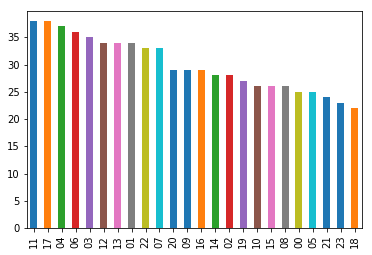

In [46]:
#6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.
%matplotlib inline
hour = table['hour'].value_counts()
hour.plot(kind='bar')
list(hour.items())[list(hour).index(hour.max())]

In [47]:
#7. Заполните строки в которых для метеоритов не указана скорость.
#table[table['Velocity (km/s)'].isnull()] = table['Velocity (km/s)'].median()
table['Velocity (km/s)'].fillna(table['Velocity (km/s)'].median(), inplace = True)
table['Velocity (km/s)'].head(10)

0    16.9
1    17.2
2    13.7
3    15.2
4    24.3
5    13.6
6    18.4
7    16.9
8    16.9
9    21.5
Name: Velocity (km/s), dtype: float64

('11', 65)

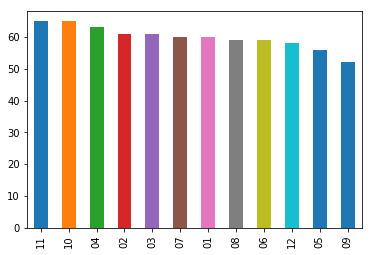

In [48]:
#8. Определить месяц года, для которого появление метеоритов наиболее вероятно (построить необходимые графики).
%matplotlib inline
month = table['month'].sort_values().value_counts()
month.plot(kind='bar')
list(month.items())[list(month).index(month.max())]